# Problem Statement: 

A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:

1.)Check eligibility of the Customer given the inputs described above.

2.)If customer is not eligible for the input required amount and duration:

a.)what can be amount for the given duration.

b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

3.)Identify customer segments from given data and categorize customer into one of the segments.

# 1.)Check eligibility of the Customer given the inputs described above.

In [1]:
import pandas as pd

# Fetch both training and testing data

In [2]:
training_data=pd.read_csv("/Users/qkazi/Desktop/Faizan/training_set.csv")
pred_data=pd.read_csv("/Users/qkazi/Desktop/Faizan/testing_set.csv")

In [3]:
training_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
pred_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Missing data Treatment

In [5]:
training_data.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
pred_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
def catconsep(A):
    cat=[]
    con=[]
    for i in A.columns:
        if(A[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)
    return cat,con

In [8]:
cat,con=catconsep(training_data)

In [9]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [10]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [11]:
for i in cat:
    training_data[i]=training_data[i].fillna(training_data[i].value_counts().index[0])

In [12]:
for i in con:
    training_data[i]=training_data[i].fillna(training_data[i].mean())

In [13]:
training_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [15]:
cat,con=catconsep(pred_data)

In [16]:
for i in cat:
    pred_data[i]=pred_data[i].fillna(pred_data[i].value_counts().index[0])

In [17]:
for i in con:
    pred_data[i]=pred_data[i].fillna(pred_data[i].mean())

In [18]:
pred_data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [19]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


# EDA

In [20]:
import matplotlib.pyplot as plt
import seaborn as sb

In [21]:
cat,con=catconsep(training_data)

In [22]:
training_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

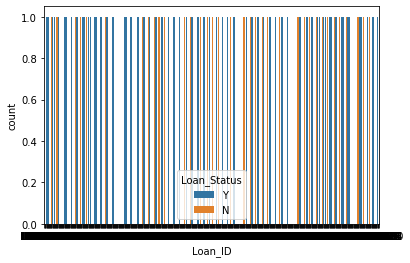

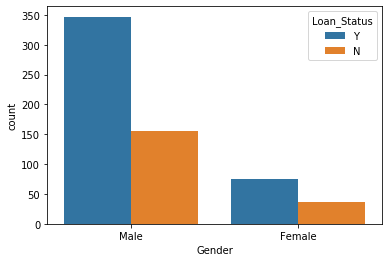

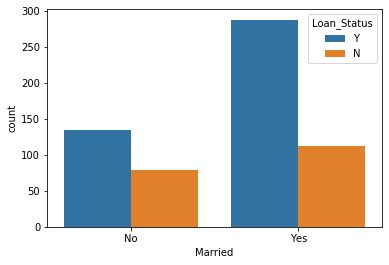

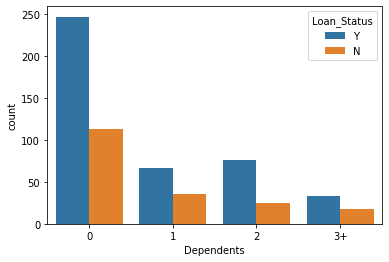

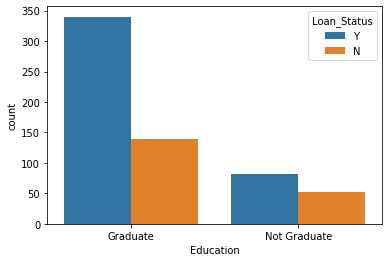

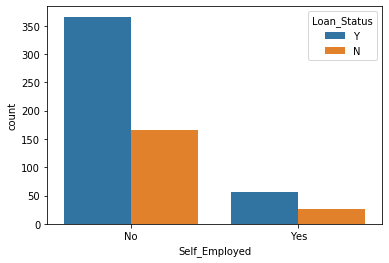

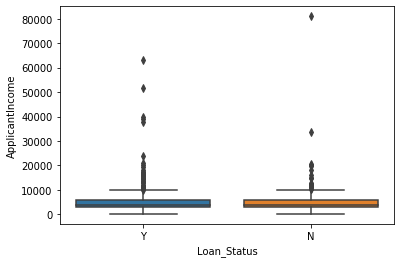

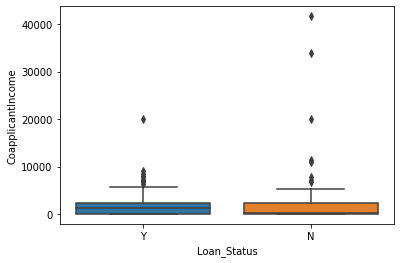

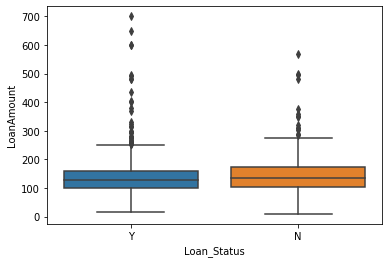

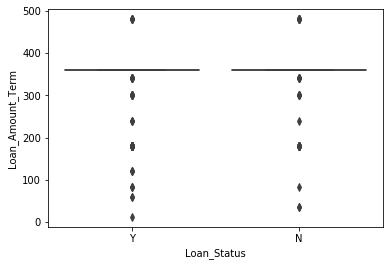

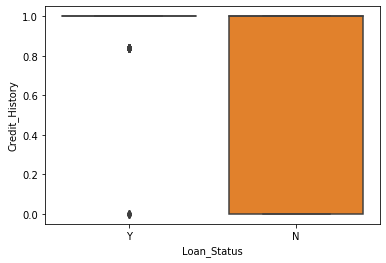

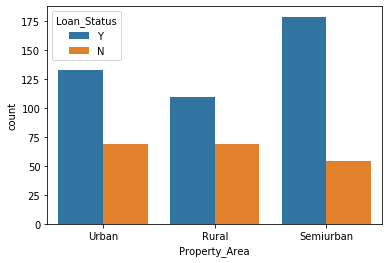

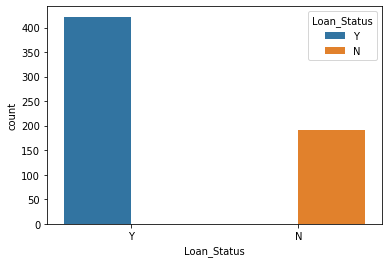

In [23]:
for i in training_data.columns:
    if(training_data[i].dtypes=="object"):
        sb.countplot(training_data[i],hue=training_data.Loan_Status)
    else:
        sb.boxplot(training_data.Loan_Status,training_data[i])
    plt.show()

# Data Preprocessing

In [24]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [25]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [26]:
cat.remove("Loan_ID")
cat.remove("Loan_Status")

In [27]:
trd_cat=training_data[cat]
trd_con=training_data[con]

In [28]:
trd=trd_con.join(pd.get_dummies(trd_cat))

In [29]:
trd

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.00000,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000.00000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583.00000,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000.00000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.00000,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106.00000,0.0,40.000000,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072.00000,240.0,253.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583.00000,0.0,187.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [30]:
cat,con=catconsep(pred_data)

In [31]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [32]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [33]:
cat.remove("Loan_ID")

In [34]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [35]:
tsd_cat=pred_data[cat]
tsd_con=pred_data[con]

In [36]:
tsd=tsd_con.join(pd.get_dummies(tsd_cat))

In [37]:
tsd

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,0.825444,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,4158,709,115.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,3250,1993,126.0,360.0,0.825444,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,5000,2393,158.0,360.0,1.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


# Assign Data into training and testing set

In [38]:
xtrain=trd
ytrain=training_data[["Loan_Status"]]

In [39]:
xtest=tsd

# Create model and find predicted results

In [40]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
model=lr.fit(xtrain,ytrain)

C:\Users\qkazi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
pred=model.predict(xtest)

In [42]:
pred_data["Predicted_Loan_Status"]=pred

In [44]:
pred_data[["Loan_ID","Predicted_Loan_Status"]]

,Loan_ID,Predicted_Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


# 2.)If customer is not eligible for the input required amount and duration:
a.)what can be amount for the given duration.

b.)if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

In [45]:
cat,con=catconsep(training_data)

In [46]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [47]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [48]:
cat.remove("Loan_ID")

In [49]:
trd=training_data[con].join(pd.get_dummies(training_data[cat]))

In [50]:
trd

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849.00000,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000.00000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583.00000,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000.00000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.00000,0.0,71.000000,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
610,4106.00000,0.0,40.000000,180.0,1.0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
611,8072.00000,240.0,253.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
612,7583.00000,0.0,187.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


In [51]:
xtrain=trd.drop(labels=["LoanAmount","Loan_Status_Y"],axis=1)
ytrain=trd[["LoanAmount"]]

In [52]:
cat,con=catconsep(pred_data)

In [53]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Predicted_Loan_Status']

In [54]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [55]:
cat.remove("Loan_ID")

In [56]:
tsd=pred_data[con].join(pd.get_dummies(pred_data[cat]))

In [57]:
tsd

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Predicted_Loan_Status_N,Predicted_Loan_Status_Y
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,1
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
3,2340,2546,100.0,360.0,0.825444,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,...,0,0,1,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,4009,1777,113.0,360.0,1.000000,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,1
363,4158,709,115.0,360.0,1.000000,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,1
364,3250,1993,126.0,360.0,0.825444,0,1,1,0,1,...,0,1,0,1,0,0,1,0,0,1
365,5000,2393,158.0,360.0,1.000000,0,1,0,1,1,...,0,1,0,1,0,1,0,0,0,1


In [58]:
xtest=tsd[pred=="N"]

In [59]:
xtest=xtest.drop(labels=["LoanAmount"],axis=1)

In [60]:
xtest=xtest.drop(labels=["Predicted_Loan_Status_Y"],axis=1)

In [61]:
ytest=tsd[["LoanAmount"]][pred=="N"]

In [62]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [63]:
model=dtr.fit(xtrain,ytrain)

In [64]:
pred=model.predict(xtest)

In [65]:
xtrain.shape

(614, 20)

In [66]:
ytrain.shape

(614, 1)

In [67]:
xtest.shape

(62, 20)

In [68]:
ytest.shape

(62, 1)

In [69]:
xtest

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Predicted_Loan_Status_N
7,3881,0,360.0,0.000000,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1
13,12173,0,360.0,0.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1
25,0,24000,360.0,0.000000,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1
35,3150,0,360.0,0.000000,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,1
55,2750,0,360.0,0.000000,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,3015,2000,360.0,0.825444,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,1
339,4333,2333,360.0,0.000000,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
346,3391,1966,360.0,0.000000,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,1
351,2283,15000,360.0,0.825444,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1


In [70]:
tsd.shape

(367, 22)

In [71]:
trd.shape

(614, 22)

In [72]:
pred=list(pred)

In [73]:
pred

[90.0,
 164.0,
 216.0,
 100.0,
 75.0,
 216.0,
 100.0,
 95.0,
 127.0,
 137.0,
 135.0,
 124.0,
 158.0,
 70.0,
 103.0,
 58.0,
 93.0,
 88.0,
 137.0,
 320.0,
 105.0,
 94.0,
 125.0,
 376.0,
 181.0,
 88.0,
 63.0,
 88.0,
 58.0,
 90.0,
 159.0,
 173.0,
 116.0,
 100.0,
 106.0,
 243.0,
 151.0,
 72.0,
 128.0,
 93.0,
 137.0,
 495.0,
 138.0,
 155.0,
 80.0,
 75.0,
 138.0,
 128.0,
 243.0,
 187.0,
 44.0,
 112.0,
 135.0,
 88.0,
 110.0,
 138.0,
 93.0,
 81.0,
 151.0,
 104.0,
 100.0,
 128.0]

In [74]:
actual_LoanAmount=list(ytest.LoanAmount)

In [75]:
D=pd.DataFrame([actual_LoanAmount,list(pred)]).T

In [76]:
D

,0,1
0,147.0,90.0
1,166.0,164.0
2,148.0,216.0
3,176.0,100.0
4,130.0,75.0
...,...,...
57,145.0,81.0
58,162.0,151.0
59,133.0,104.0
60,106.0,100.0


In [77]:
D.columns=["Actual","Predicted"]

# a.) Predicted Loan Amount for the given duration

In [78]:
D

,Actual,Predicted
0,147.0,90.0
1,166.0,164.0
2,148.0,216.0
3,176.0,100.0
4,130.0,75.0
...,...,...
57,145.0,81.0
58,162.0,151.0
59,133.0,104.0
60,106.0,100.0


In [79]:
pred

[90.0,
 164.0,
 216.0,
 100.0,
 75.0,
 216.0,
 100.0,
 95.0,
 127.0,
 137.0,
 135.0,
 124.0,
 158.0,
 70.0,
 103.0,
 58.0,
 93.0,
 88.0,
 137.0,
 320.0,
 105.0,
 94.0,
 125.0,
 376.0,
 181.0,
 88.0,
 63.0,
 88.0,
 58.0,
 90.0,
 159.0,
 173.0,
 116.0,
 100.0,
 106.0,
 243.0,
 151.0,
 72.0,
 128.0,
 93.0,
 137.0,
 495.0,
 138.0,
 155.0,
 80.0,
 75.0,
 138.0,
 128.0,
 243.0,
 187.0,
 44.0,
 112.0,
 135.0,
 88.0,
 110.0,
 138.0,
 93.0,
 81.0,
 151.0,
 104.0,
 100.0,
 128.0]

In [80]:
trd

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849.00000,0.0,146.412162,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,5405.54085,1508.0,128.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
2,3000.00000,0.0,66.000000,360.0,1.0,0,1,0,1,1,...,0,1,0,0,1,0,0,1,0,1
3,2583.00000,2358.0,120.000000,360.0,1.0,0,1,0,1,1,...,0,0,1,1,0,0,0,1,0,1
4,6000.00000,0.0,141.000000,360.0,1.0,0,1,1,0,1,...,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900.00000,0.0,71.000000,360.0,1.0,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
610,4106.00000,0.0,40.000000,180.0,1.0,0,1,0,1,0,...,1,1,0,1,0,1,0,0,0,1
611,8072.00000,240.0,253.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
612,7583.00000,0.0,187.000000,360.0,1.0,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1


In [81]:
xtrain=trd.drop(labels=["Loan_Amount_Term","Loan_Status_N","Loan_Status_Y"],axis=1)
ytrain=trd[["Loan_Amount_Term"]]

[90.0,
 164.0,
 216.0,
 100.0,
 75.0,
 216.0,
 100.0,
 95.0,
 127.0,
 137.0,
 135.0,
 124.0,
 158.0,
 70.0,
 103.0,
 58.0,
 93.0,
 88.0,
 137.0,
 320.0,
 105.0,
 94.0,
 125.0,
 376.0,
 181.0,
 88.0,
 63.0,
 88.0,
 58.0,
 90.0,
 159.0,
 173.0,
 116.0,
 100.0,
 106.0,
 243.0,
 151.0,
 72.0,
 128.0,
 93.0,
 137.0,
 495.0,
 138.0,
 155.0,
 80.0,
 75.0,
 138.0,
 128.0,
 243.0,
 187.0,
 44.0,
 112.0,
 135.0,
 88.0,
 110.0,
 138.0,
 93.0,
 81.0,
 151.0,
 104.0,
 100.0,
 128.0]

In [98]:
xtest=tsd[pred=="N"].drop(labels=["Loan_Amount_Term"],axis=1)

In [99]:
ytest=tsd[["Loan_Amount_Term"]][pred=="N"]

In [95]:
xtrain.shape

(614, 19)

In [96]:
ytrain.shape

(614, 1)

In [100]:
xtest.shape

(62, 21)

In [101]:
ytest.shape

(62, 1)

In [102]:
tsd.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Predicted_Loan_Status_N,Predicted_Loan_Status_Y
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,...,0,1,0,1,0,0,0,1,0,1
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
3,2340,2546,100.0,360.0,0.825444,0,1,0,1,0,...,0,1,0,1,0,0,0,1,0,1
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,...,0,0,1,1,0,0,0,1,0,1


In [105]:
xtest=tsd.drop(labels=["Predicted_Loan_Status_N","Predicted_Loan_Status_Y","Loan_Amount_Term"],axis=1)

In [116]:
xtest.shape

(367, 19)

In [113]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(max_depth=3)
model=dtr.fit(xtrain,ytrain)
pred_duration=model.predict(xtest)

In [125]:
pred_duration

array([353.81314879, 318.47727273, 318.47727273, 318.47727273,
       353.81314879, 330.88235294, 342.36363636, 342.36363636,
       318.47727273, 353.81314879, 353.81314879, 342.36363636,
       318.47727273, 342.36363636, 353.81314879, 318.47727273,
       318.47727273, 342.36363636, 330.88235294, 330.88235294,
       318.47727273, 318.47727273, 353.81314879, 353.81314879,
       330.88235294, 330.88235294, 318.47727273, 330.88235294,
       353.81314879, 353.81314879, 353.81314879, 318.47727273,
       353.81314879, 353.81314879, 353.81314879, 353.81314879,
       318.47727273, 353.81314879, 353.81314879, 353.81314879,
       353.81314879, 353.81314879, 353.81314879, 353.81314879,
       353.81314879, 330.88235294, 353.81314879, 353.81314879,
       330.88235294, 342.36363636, 318.47727273, 342.36363636,
       342.36363636, 318.47727273, 353.81314879, 353.81314879,
       353.81314879, 342.36363636, 342.36363636, 342.36363636,
       353.81314879, 353.81314879, 342.36363636, 353.81

In [126]:
a=ytest["Loan_Amount_Term"]/12

In [127]:
b=pred_duration/12

In [129]:
Q = pd.DataFrame([a,b]).T

In [131]:
Q.columns=["Loan_Amount_Term","predicted_duration"]

# b.) Predicted Loan Amount Term for required Loan Amount for some longer duration

In [132]:
Q

,Loan_Amount_Term,predicted_duration
7,30.0,28.530303
13,30.0,28.530303
25,30.0,27.573529
35,30.0,29.484429
55,30.0,29.484429
...,...,...
336,30.0,29.484429
339,30.0,29.484429
346,30.0,29.484429
351,30.0,27.573529


# 3.) Identify customer segments from given data and categorize customer into one of the segments.


In [134]:
training_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.00000,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.00000,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.00000,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.00000,0.0,187.000000,360.0,1.0,Urban,Y


In [135]:
B=training_data[["LoanAmount"]]

In [136]:
B["Income"]=training_data.ApplicantIncome+training_data.CoapplicantIncome

C:\Users\qkazi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)
model=km.fit(B)

In [138]:
model.labels_

array([1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1,
       1, 2, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

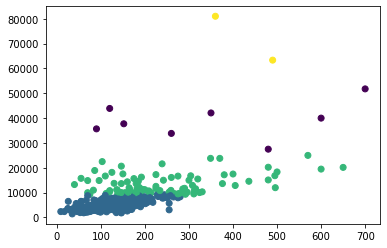

In [140]:
plt.scatter(B["LoanAmount"],B.Income,c=model.labels_)